
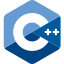
<br>

<div style="text-align:center; font-size:200%;">
 <b>Member Functions</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 03 Member Functions.ipynb -->
<!-- slides/module_150_classes/topic_110_member_functions.cpp -->


# Member Functions

- Wir können Funktionen in Structs (und Klassen) definieren.
- Diese Funktionen heißen *Member Functions*.
- Member Functions werden mit dem `.`-Operator aufgerufen.
- Im Rumpf einer Member Function können wir auf die anderen Member des
  Objekts zugreifen.

In [ ]:
struct Point {
    double x{0.0};
    double y{0.0};
};

In [ ]:
Point p1{1.0, 2.0};
Point p2{4.0, 6.0};


- Wir können Member Functions auch außerhalb des Structs **definieren**.
- Im Struct **deklarieren** wir die Member Function nur.
- Oft werden Structs in Header-Dateien deklariert und ihre Member Functions
  in einer Quelldatei definiert.
- Bei der Definition der Funktion schreiben wir den Namen des Structs vor den
  Funktionsnamen, mit dem `Scope`-Operator `::` als Trennzeichen: `Point::move()`

In [ ]:
struct Point {
    double x{0.0};
    double y{0.0};
};

In [ ]:
#include <cmath>

In [ ]:
double Point::distance(const Point& other)
{
    double dx{x - other.x};
    double dy{y - other.y};
    return std::sqrt(dx * dx + dy * dy);
}

In [ ]:
void Point::move(double dx, double dy)
{
    x += dx;
    y += dy;
}

In [ ]:
void Point::move(const Point& other)
{
    move(other.x, other.y);
}


- Die Verwendung ist identisch zu der Member Function, die im Struct
  definiert wurde.

In [ ]:
Point p{1.0, 2.0};

In [ ]:
p.distance(Point{3.0, 4.0})

In [ ]:
p.move(1.0, 1.0)

In [ ]:
p.x


## `this`-Pointer

- Das Schlüsselwort `this` ist ein Pointer auf das Objekt, auf dem die Member
  Function aufgerufen wurde.
- Statt direkt auf Member zuzugreifen, können wir auch `this->` verwenden:

In [ ]:
struct Point {
    double x{0.0};
    double y{0.0};

    double distance(const Point& other);
    void move(double dx, double dy);
    void move(const Point& other);
};

In [ ]:
double Point::distance(const Point& other)
{
    double dx{this->x - other.x};
    double dy{this->y - other.y};
    return std::sqrt(dx * dx + dy * dy);
}

In [ ]:
void Point::move(double dx, double dy)
{
    this->x += dx;
    this->y += dy;
}

In [ ]:
void Point::move(const Point& other)
{
    this->move(other.x, other.y);
}

In [ ]:
Point p1{1.0, 2.0};
Point p2{4.0, 6.0};

In [ ]:
p1.distance(p2)

In [ ]:
p2.move(2.0, 1.0);

In [ ]:
p1.distance(p2)


## Member-Funktionen und `const`

- Nachdem wir mit dem `this`-Pointer das Objekt modifizieren können, können
  wir Member-Funktionen nicht auf `const Point`-Objekten aufrufen:

In [ ]:
const Point cp1{1.0, 2.0};
const Point cp2{4.0, 6.0};

In [ ]:
// cp1.move(1.0, 2.0);


- Für Funktionen, wie `distance()` ist das unnötig, da sie das Objekt nicht
  verändern.

In [ ]:
// cp1.distance(cp2)

In [ ]:
p1.distance(cp2)


## `const`-qualifizierte Member-Funktionen

- Eine Member-Funktion kann mit `const` qualifiziert werden
- Dann ist `this` ein Zeiger auf ein `const Point`-Objekt
- Der `const`-Qualifier steht hinter der Parameterliste:

In [ ]:
struct Point {
    double x{0.0};
    double y{0.0};

    double distance(const Point& other) const;
};

In [ ]:
double Point::distance(const Point& other) const
{
    double dx{x - other.x};
    double dy{y - other.y};
    return std::sqrt(dx * dx + dy * dy);
}

In [ ]:
const Point cp1{1.0, 2.0};
const Point cp2{4.0, 6.0};

In [ ]:
cp1.distance(cp2)


- Auch in `const`-qualifizierten Member-Funktionen können wir
  den `this`-Pointer explizit verwenden:

In [ ]:
struct Point {
    double x{0.0};
    double y{0.0};

    double distance(const Point& other) const
    {
        double dx{this->x - other.x};
        double dy{this->y - other.y};
        return sqrt(dx * dx + dy * dy);
    }
};

In [ ]:
const Point cp1{1.0, 2.0};
const Point cp2{4.0, 6.0};

In [ ]:
cp1.distance(cp2)


## Überladen von Const-Qualifizierung

- Eine Member-Funktion kann in zwei Varianten existieren:
  - `const`-qualifiziert
  - nicht `const`-qualifiziert

In [ ]:
#include <iostream>

In [ ]:
struct Point {
    double x_;
    double y_;

    double x() const;
    double& x();

    double y() const { return y_; }
    // double& y() { return y_; }
};

In [ ]:
double Point::x() const
{
    std::cout << "x() const\n";
    return x_;
}

In [ ]:
double& Point::x()
{
    std::cout << "x()\n";
    return x_;
}

In [ ]:
Point p{1.0, 2.0};

In [ ]:
const Point cp{1.0, 2.0};


## Mini-Workshop: Counter

In diesem Workshop implementieren wir eine Struct `Counter`, die einen Zähler
darstellt.

- Der Zähler soll einen Wert haben, der mit `0` initialisiert wird.
- Die Klasse soll folgende Member-Funktionen haben:
  - `increment()`: Erhöht den Zähler um `1`.
  - `decrement()`: Verringert den Zähler um `1`.
  - `value()`: Gibt den aktuellen Wert des Zählers zurück.
    - Diese Funktion soll so überladen sein, dass damit für Zähler, die nicht
      `const` sind, der Wert geändert werden kann.

- Implementieren Sie die Klasse `Counter` und testen Sie die
  Member-Funktionen.